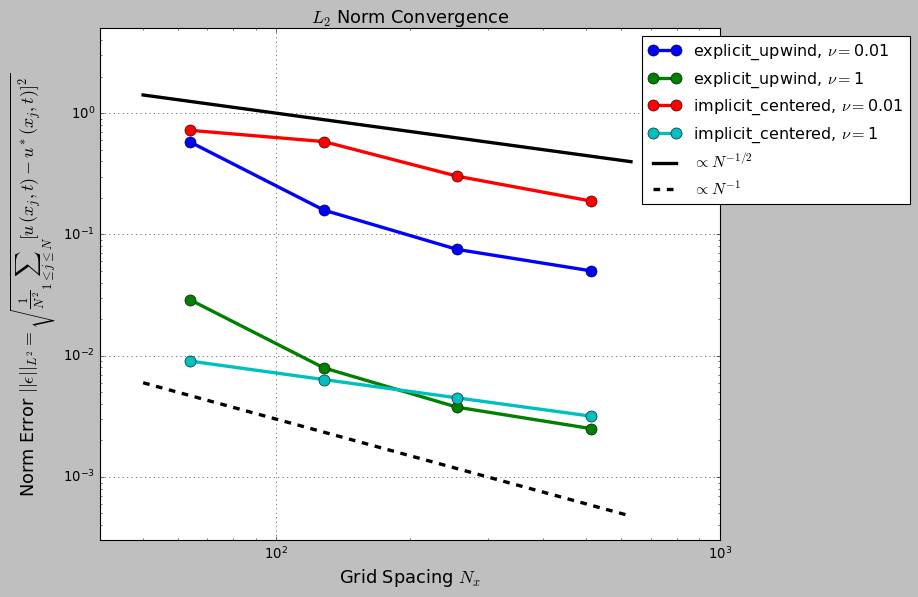

In [49]:
from math import comb
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


if __name__ == "__main__":

    combos = []
    alldxs = []
    allnorms = []

    for prefix in ["explicit_upwind", "implicit_centered"]:
        for diffval in ["0.01", "1"]:

            minfile = glob(f"../conv_data/{prefix}_n32_v{diffval}")[0]
            file64  = glob(f"../conv_data/{prefix}_n64_v{diffval}")[0]
            file128 = glob(f"../conv_data/{prefix}_n128_v{diffval}")[0]
            file256 = glob(f"../conv_data/{prefix}_n256_v{diffval}")[0]
            file512 = glob(f"../conv_data/{prefix}_n512_v{diffval}")[0]

            mindata = np.genfromtxt(sorted(glob(f"{minfile}/outputs/*.csv"))[9], delimiter=", ")[:-1]
            data64  = np.genfromtxt(sorted(glob(f"{file64}/outputs/*.csv"))[9], delimiter=", ")[:-1]
            data128 = np.genfromtxt(sorted(glob(f"{file128}/outputs/*.csv"))[9], delimiter=", ")[:-1]
            data256 = np.genfromtxt(sorted(glob(f"{file256}/outputs/*.csv"))[9], delimiter=", ")[:-1]
            data512 = np.genfromtxt(sorted(glob(f"{file512}/outputs/*.csv"))[9], delimiter=", ")[:-1]

           # print(data128)
            
            norms = []
            dxs = []

            # check error on 64
            shrunk_ds = np.mean(data64.reshape((mindata.size, data64.size//mindata.size)),axis=1)
            # print(shrunk_ds)
            norms.append(np.sqrt(abs((shrunk_ds ** 2 - mindata ** 2).sum())))
            dxs.append(64)

            # check error on 128
            shrunk_ds = np.mean(data128.reshape((data64.size, data128.size//data64.size)),axis=1)
            # print(shrunk_ds)
            norms.append(np.sqrt(abs((shrunk_ds ** 2 - data64 ** 2).sum())))
            dxs.append(128)

            # check error on 256
            shrunk_ds = np.mean(data256.reshape((data128.size, data256.size//data128.size)),axis=1)
            # print(shrunk_ds)
            norms.append(np.sqrt(abs((shrunk_ds ** 2 - data128 ** 2).sum())))
            dxs.append(256)

            # Check on 512
            shrunk_ds = np.mean(data512.reshape((data256.size, data512.size//data256.size)),axis=1)
            # print(shrunk_ds)
            norms.append(np.sqrt(abs((shrunk_ds ** 2 - data256 ** 2).sum())))
            dxs.append(512)

            alldxs.append(dxs)
            allnorms.append(norms)
            combos.append(rf"{prefix}, $\nu =${diffval}")

            # print(norms)

            
    plt.style.use('classic')
    fig = plt.figure(figsize=(10,8))

    plt.loglog(alldxs[0], allnorms[0], label=combos[0], linewidth=3, markersize=10, marker="o", linestyle="-")
    plt.loglog(alldxs[1], allnorms[1], label=combos[1], linewidth=3, markersize=10, marker="o", linestyle="-")
    plt.loglog(alldxs[2], allnorms[2], label=combos[2], linewidth=3, markersize=10, marker="o", linestyle="-")
    plt.loglog(alldxs[3], allnorms[3], label=combos[3], linewidth=3, markersize=10, marker="o", linestyle="-")
    
    N_trend = np.logspace(1.7,2.8,100)
    plt.loglog(N_trend, 10 * N_trend**(-0.5), label=r"$\propto N^{-1/2}$", linewidth=3, color="black", linestyle="-")
    plt.loglog(N_trend, 0.3 * N_trend**(-1), label=r"$\propto N^{-1}$", linewidth=3, color="black", linestyle="--")
    plt.minorticks_on()
    plt.legend(bbox_to_anchor=(1.32, 1.0))
    plt.grid()
    plt.xlim(40,1000)
    plt.ylim(0.0003,5)
    
    plt.xlabel(r"Grid Spacing $N_x$",fontsize=16)
    plt.ylabel(r"Norm Error $||\epsilon||_{L^2} = \sqrt{\frac{1}{N^2} \sum_{1 \leq j \leq N} [u \, (x_j, t) - u^*(x_j, t)]^2}$",fontsize=16)
    plt.title(r"$L_2$ Norm Convergence",fontsize=16)

    plt.savefig("convergence_plot.png", bbox_inches='tight', dpi=300)
